## Linear Regression
1. Assumptions:
    * **Linearity**: The relationship between X and the mean of Y is linear.
    * **Homoscedasticity**: The variance of residual is the same for any value of X.
    * **Independence**: Observations are independent of each other.
    * **Normality**: For any fixed value of X, Y is normally distributed.
2. Model : Algorithm + data + Hyperparameter forms a model.
3. Testing and Training : <....>
4. Regression Types :
    * Parametric
        - Assumption y = f(x)
        - Function applies to all values of x
        - Learning means deciding on the function / parameters / weights.
        - e.g. SVM, least square errors
    * Non-parametic :
        - No assumption on the dataset values
        - e.g. k-means
5. Linear model needs less data to train, easy to fit a line.
6. Linear regression has a high bias and low variance.
<img src="images/linear1.png" height="50%" width="50%" align="center" />
7. Gradient descent is a convex shaped curve, as it is obtained from sum of squares of the errors and hence parabola.
8. Gradient Descent:
    * Batch-gradient descent : update weights after training on entire dataset.
    * Stochastic gradient descent : Update weight after training on single data point.
    * Mini-batch gradient Descent : Update weights after training on some number of instances.
    <img src="images/lr1.png" height="50%" width="50%" align="center" />
10. Problem with Gradient Descent:
    * Local Minima, but will not occur with MSE, as the curve would be convex
    * Saddle points : Gradient is zero even though point is not a minimum [dataset with high feature sets]
    <img src="images/gradient1.png" height="50%" width="50%" align="center" />
11. $R^2$ = goodness of fit
    * Calculation :
    * $R^{2}=\frac{variance(Y)-variance(model)}{variance(Y)}$
9. sklearn functions:
    * `from sklearn.linear_model import LinearRegression`


In [8]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('dataset/toluca.csv')
df.head()

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


<AxesSubplot:xlabel='workHours', ylabel='lotSize'>

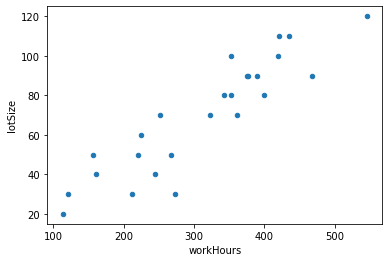

In [3]:
df.plot.scatter(x="workHours",y="lotSize")

In [4]:
df.describe()

,lotSize,workHours
count,25.000000,25.000000
mean,70.000000,312.280000
std,28.722813,113.137645
min,20.000000,113.000000
25%,50.000000,224.000000
50%,70.000000,342.000000
75%,90.000000,389.000000
max,120.000000,546.000000


In [5]:
# Variance of data
df.var()

lotSize        825.000000
workHours    12800.126667
dtype: float64

df.iloc[:,1] : Creates Series and for the model to fit it requires a martix, doig df.iloc[:,1:] returns a matrix

In [14]:
reg = LinearRegression()
reg.fit(df.iloc[:,1:],df.iloc[:,0])

LinearRegression()

In [15]:
r2_score(df.lotSize,reg.predict(df.iloc[:,1:]))

0.8215334744346305

In [10]:
reg.score(df.iloc[:,1:],df.lotSize)

0.8215334744346305

In [12]:
df.iloc[:,0:]

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


## Housing dataset

In [73]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('dataset/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
# checking null values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [31]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [32]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Data Visualisation

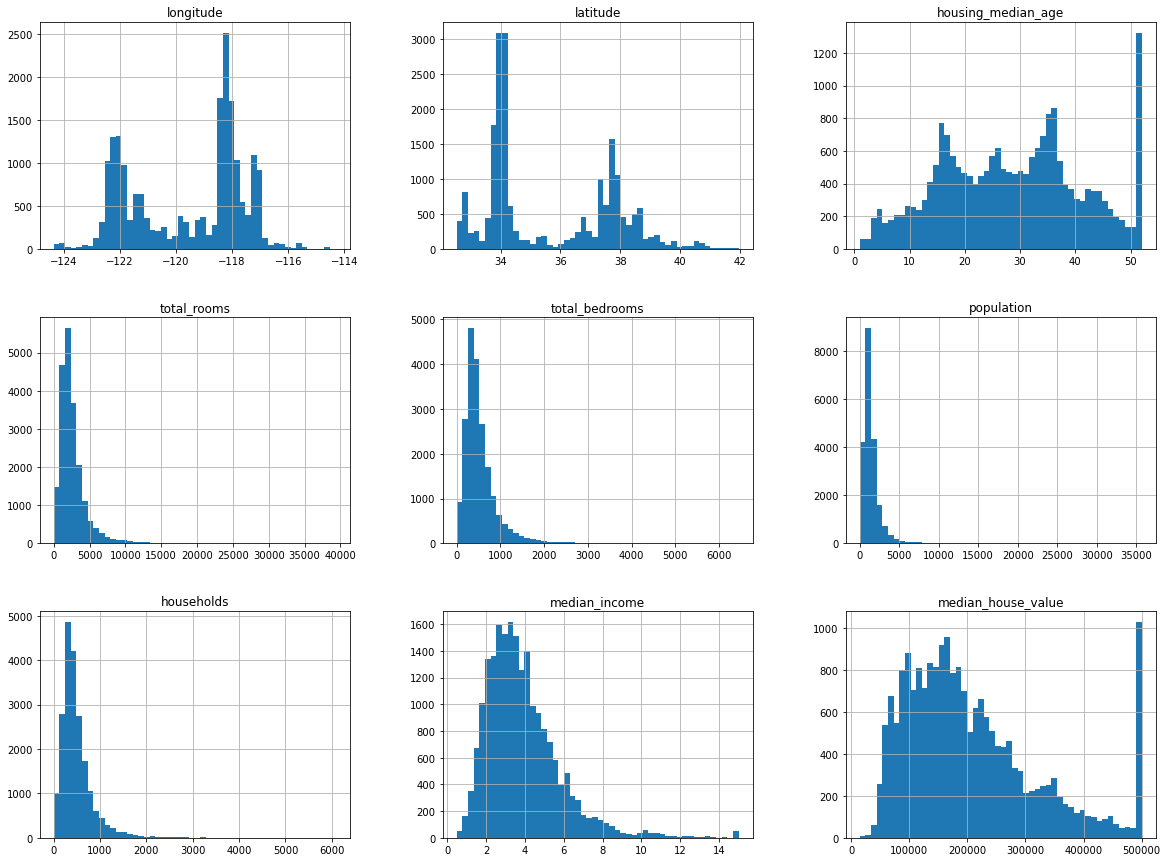

In [33]:
# Understanding data distribution
df.hist(bins=50, figsize=(20,15))
plt.show()

Caping : housing_median_age, median_house_value, median_income(values are assigned a common value above a particular max value)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

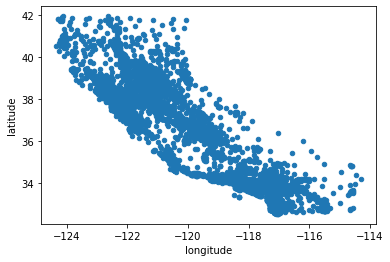

In [34]:
df.plot(kind='scatter',x='longitude',y='latitude')

/Users/shrikantkendre/miniforge3/envs/tf2M1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


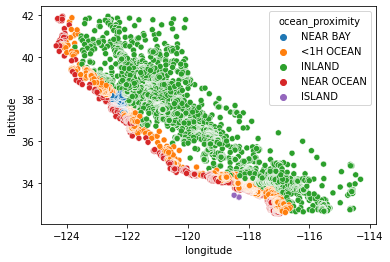

In [35]:
sns.scatterplot('longitude','latitude',hue='ocean_proximity',data=df)
plt.show()

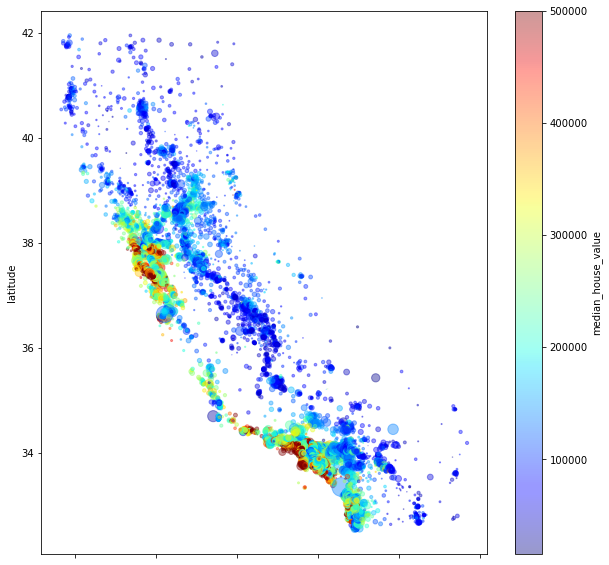

In [36]:
# Check if houses in sf are more expensive theh other 
df.plot(kind='scatter',x='longitude',y='latitude',c='median_house_value',s=df["population"]/100,cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
plt.show()

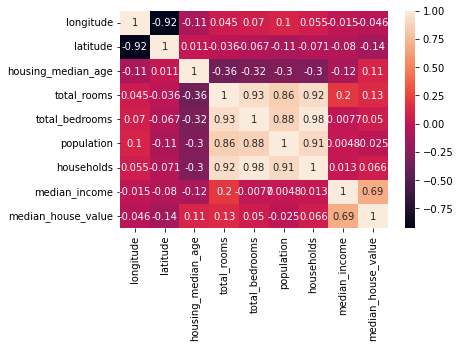

In [37]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

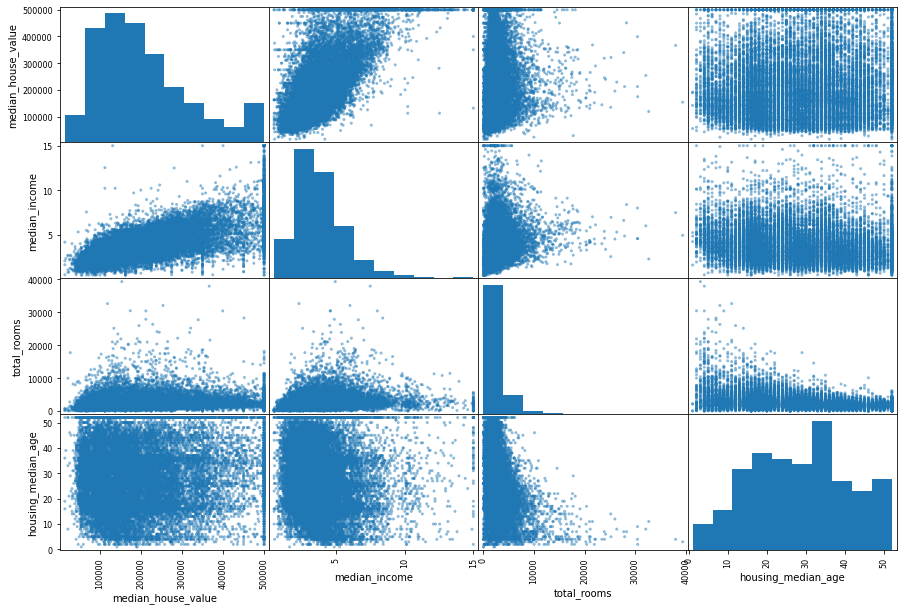

In [38]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attributes],figsize=(15,10))
plt.show()

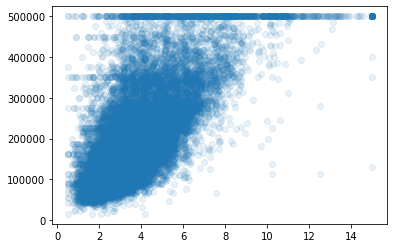

In [39]:
# Observing weird horizontal lines in median_house_value vs median_income
plt.scatter(df['median_income'],df['median_house_value'],alpha=0.1)
plt.show()

## Feature Engineering
**Creating more columns that have high correlation with the target column**

In [40]:
df['total_bedrooms'] = df.total_bedrooms.fillna(df['total_bedrooms'].dropna().median())

In [41]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [42]:
corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

Check for poor correlation columns and see if we can create new features

In [43]:
df['bedrooms_per_capita'] = df['total_bedrooms']/df["households"]

In [44]:
df['person_per_bedrooms'] = df['population']/df['total_bedrooms']

In [45]:
df["total_community_income"] = df['households'] * df['median_income']

In [46]:
df['bedroom_room_ratio'] = df["total_bedrooms"] / df["total_rooms"]

In [47]:
df.corr()['median_house_value']

longitude                -0.045967
latitude                 -0.144160
housing_median_age        0.105623
total_rooms               0.134153
total_bedrooms            0.049457
population               -0.024650
households                0.065843
median_income             0.688075
median_house_value        1.000000
bedrooms_per_capita      -0.045637
person_per_bedrooms      -0.018991
total_community_income    0.352662
bedroom_room_ratio       -0.233303
Name: median_house_value, dtype: float64

## Converting categorical to numerical values

In [48]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [49]:
df = pd.get_dummies(df)

In [50]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_capita,person_per_bedrooms,total_community_income,bedroom_room_ratio,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.023810,2.496124,1048.9752,0.146591,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.971880,2.170886,9446.9932,0.155797,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.073446,2.610526,1284.5598,0.129516,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.073059,2.374468,1235.8389,0.184458,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.081081,2.017857,996.1658,0.172096,0,0,0,1,0


In [53]:
# If we don't want to use pd.get_dummies(df)
# encoder = LabelBinarizer()
# encoder.fit(df['ocean_proximity'])
# one_hot_array = encoder.transform(df['ocean_proximity'])
# one_hot_array

In [54]:
# one_hot_df = pd.DataFrame(one_hot_array,columns=['<1H OCEAN','INLAND','ISLAND','NEAR_BAY','NEAR_OCEAN'])
# df = pd.concat([df,one_hot_df],axis=1)

In [51]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['median_house_value'],axis=1),df['median_house_value'],test_size=0.2)
x_train.shape,x_test.shape

((16512, 17), (4128, 17))

## Building the Model

In [56]:
reg = LinearRegression().fit(x_train,y_train)

In [59]:
predictions = reg.predict(x_test)

In [65]:
np.sqrt(mean_squared_error(y_test,predictions))

68628.40836586671

It's not this bad when we check for the value of the `house_median_value`

## Improving model performance

In [69]:
# Scaling data 
scaler = StandardScaler().fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std.shape,x_test_std.shape

((16512, 17), (4128, 17))

### PCA

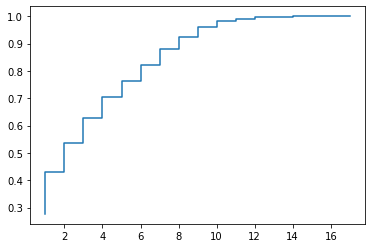

In [95]:
pca = PCA(n_components=17)
pca_data = pca.fit(x_train_std)
evr = pca.explained_variance_ratio_
plt.step(range(1,18),np.cumsum(evr))

In [79]:
pca.explained_variance_

array([4.71066729e+00, 2.58576695e+00, 1.82845962e+00, 1.57448558e+00,
       1.25646004e+00, 1.03254571e+00, 1.00118069e+00, 9.83573249e-01,
       7.48476696e-01, 6.08309385e-01, 3.69399487e-01, 1.44662030e-01,
       8.37698548e-02, 3.74907537e-02, 2.48846716e-02, 1.08976194e-02,
       3.36437934e-30])

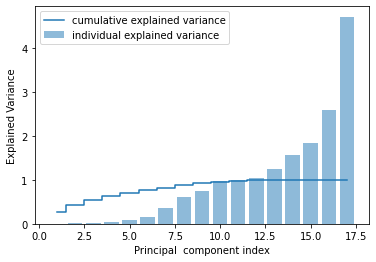

In [94]:
var_exp = pca.explained_variance_
cum_var_exp=np.cumsum(evr)
plt.bar(range(1,18),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,18),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal  component index')
plt.legend(loc='best')
plt.show()

In [90]:
sorted(pca.explained_variance_,reverse=True)

[4.710667294363262,
 2.5857669464933517,
 1.828459617946569,
 1.574485575850491,
 1.2564600448407364,
 1.0325457058610426,
 1.0011806852404443,
 0.983573249484723,
 0.7484766957755135,
 0.6083093846538581,
 0.3693994867174394,
 0.14466202987775859,
 0.08376985476212868,
 0.03749075368546665,
 0.024884671624351096,
 0.010897619442110183,
 3.364379338809505e-30]

We can see that 11 features explains almost all the data, thus we can choose 11 features

In [96]:
pca = PCA(n_components=11).fit(x_train_std)
x_train_pca = pca.transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [98]:
reg = LinearRegression().fit(x_train_pca,y_train)
np.sqrt(mean_squared_error(y_test,reg.predict(x_test_pca)))

72054.26218455883

In [99]:
reg = LinearRegression().fit(x_train_std,y_train)
np.sqrt(mean_squared_error(y_test,reg.predict(x_test_std)))

68628.31534131376